In [1]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle
from scipy.stats import ttest_ind

In [2]:
#Settings for the plots 
sns.set_style("ticks")
colors= sns.color_palette('colorblind')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 6

sns.set_style("darkgrid", {'axes.grid' : False, 'ytick.left': True, 'xtick.bottom': True})

In [3]:
DATA_PATH = './data/'
DATA_PATH2020 = DATA_PATH + 'data_2020/'
FILE2020 = DATA_PATH2020 + 'M3_df_2020_final.pkl'


DATA_PATH = 'data/'

DATA_PATH2015 = DATA_PATH + 'data2015/'
DATA_PATH2016 = DATA_PATH + 'data2016/'
DATA_PATH2017 = DATA_PATH + 'data2017/'
DATA_PATH2018 = DATA_PATH + 'data2018/'
DATA_PATH2019 = DATA_PATH + 'data2019/'
DATA_PATH2020 = DATA_PATH + 'data2020/'

FILE2015 = DATA_PATH2015 + 'origine_media_2015.pickle'
FILE2016 = DATA_PATH2016 + 'origine_media_2016.pickle'
FILE2017 = DATA_PATH2017 + 'origine_media_2017.pickle'
FILE2018 = DATA_PATH2018 + 'origine_media_2018.pickle'
FILE2019 = DATA_PATH2019 + 'origine_media_2019.pickle'
FILE2020 = DATA_PATH2020 + 'origine_media_2020.pickle'

FILES = [FILE2015, FILE2016, FILE2017, FILE2018, FILE2019, FILE2020]

In [4]:
with open(FILE2015, 'rb') as input_file:
    df_2015_base = pickle.load(input_file)

In [5]:
with open(FILE2016, 'rb') as input_file:
    df_2016_base = pickle.load(input_file)

In [6]:
with open(FILE2017, 'rb') as input_file:
    df_2017_base = pickle.load(input_file)

In [7]:
with open(FILE2018, 'rb') as input_file:
    df_2018_base = pickle.load(input_file)

In [8]:
with open(FILE2019, 'rb') as input_file:
    df_2019_base = pickle.load(input_file)

In [9]:
with open(FILE2020, 'rb') as input_file:
    df_2020_base = pickle.load(input_file)

In [10]:
df_origine_media = df_2015_base.append(df_2016_base.append(df_2017_base.append(df_2018_base.append(df_2019_base.append(df_2020_base)))))

In [11]:
df_origine_media.head()

,media_country,gender,age_range,quotation_length,count,year
0,United States of America,Male,"(50, 60]",44,2411,2015
1,United States of America,Male,"(50, 60]",34,2317,2015
2,United States of America,Male,"(50, 60]",57,2315,2015
3,United States of America,Male,"(50, 60]",36,2289,2015
4,United States of America,Male,"(50, 60]",38,2275,2015


In [12]:
all_newspaper_countries = df_origine_media.groupby(['media_country'])['count'].sum().to_frame(name="count").sort_values(['count'],ascending=False).reset_index()

In [13]:
all_newspaper_countries

,media_country,count
0,United States of America,9611301
1,Australia,1936196
2,United Kingdom,1388500
3,New Zealand,1145499
4,Canada,976898
5,India,635837
6,Singapore,472837
7,Nigeria,278051
8,France,275659
9,Israel,260740


In [14]:
df_origine_media_gender = df_origine_media.groupby(["media_country","gender"])['count'].sum().to_frame(name="count").reset_index()

In [15]:
df_origine_media_gender

,media_country,gender,count
0,Australia,Female,342415
1,Australia,Male,1593781
2,Brazil,Female,380
3,Brazil,Male,2034
4,Canada,Female,171031
5,Canada,Male,805867
6,France,Female,26219
7,France,Male,249440
8,Germany,Female,17622
9,Germany,Male,82652


In [16]:
def plot_quotes_media_country(df_media_country):
    """
        Function to plot the number of quotes depending on `gender` and `media_country`
    :param df: dataframe 
    """    
    f = plt.figure(figsize=(12,6))
    ax = sns.barplot(data=df_media_country.sort_values(['count'],ascending=False), x='media_country',y='count', hue='gender')
    plt.xlabel("Top media's country")
    plt.ylabel('Number of quotes')
    plt.yscale('log')
    #year = df['quoteID'][0][0:4]
    #plt.title("Number of quotes depending on gender and media's country for the year "+year)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45,  horizontalalignment='right')

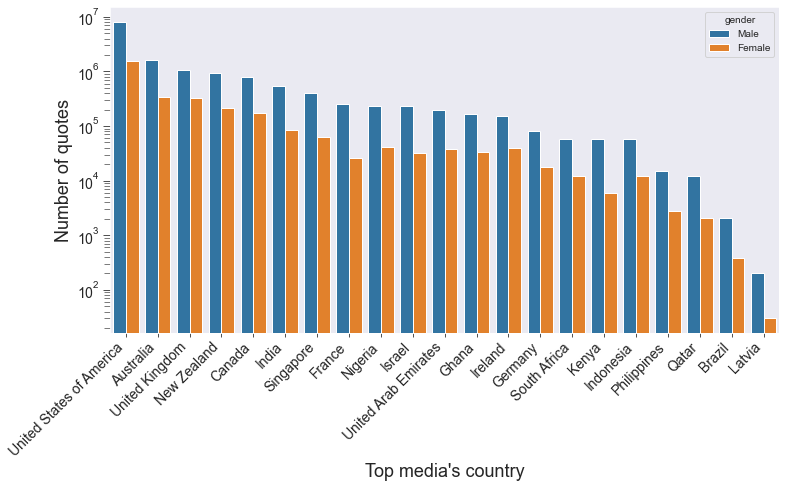

In [17]:
plot_quotes_media_country(df_origine_media_gender)

## Why not consider the difference between countries. Females are in general less quoted okay, but does it seem better for occidental countries ?

In [18]:
df_female = df_origine_media_gender[df_origine_media_gender['gender'] == 'Female'].reset_index(drop=True)
df_country = df_origine_media_gender.groupby(['media_country'])['count'].sum().to_frame(name="total").reset_index(drop=True)

In [19]:
df_female_prop = df_female.merge(df_country,left_index = True, right_index=True).drop(['gender'], axis = 1)

In [21]:
df_female_prop['Female %'] = df_female_prop['count']/df_female_prop['total']*100

In [22]:
df_female_prop

,media_country,count,total,Female %
0,Australia,342415,1936196,17.684935
1,Brazil,380,2414,15.741508
2,Canada,171031,976898,17.507560
3,France,26219,275659,9.511389
4,Germany,17622,100274,17.573848
5,Ghana,32772,196340,16.691454
6,India,85632,635837,13.467603
7,Indonesia,12038,69744,17.260266
8,Ireland,39718,193199,20.558077
9,Israel,32450,260740,12.445348


In [23]:
def barplot(df, x, y, hue, log='lin'):
    f = plt.figure(figsize=(12,6))
    ax = sns.barplot(data=df, x=x,y=y, hue=hue)
    if log=='log':
        plt.yscale('log')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45,  horizontalalignment='right')

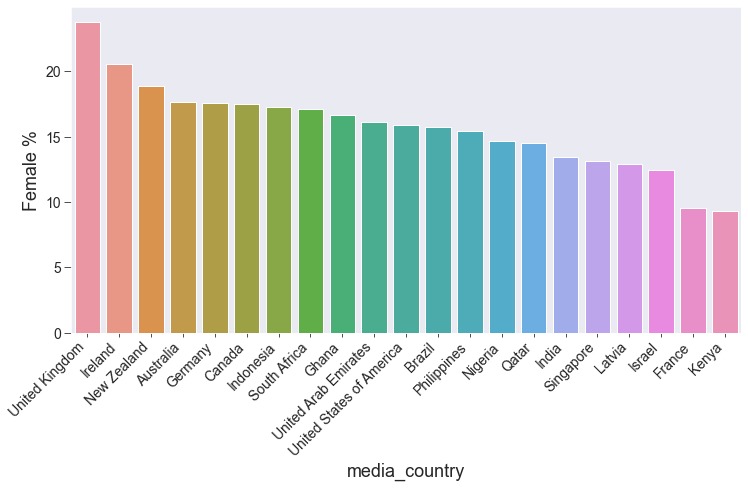

In [25]:
barplot(df_female_prop.sort_values(['Female %'],ascending=False),'media_country','Female %', None)

### Interesting France is very low (less than 10% of quotes are from women...) Compare it with Germany (also a non english speaking country, that has about the same education level) that has 17.57% ...

We could even try to find out why an english speaking country would tend to quote more women (should the language really have an impact?)

Why not also consider United Arab emirates, which we would have expected, as occidentals at least, to quote less women than France!

#### Comparison FRANCE vs GERMANY (ça fait un peu 2nd WW hahahah), les français prennent de nouveau cher, c'est pas coool :(

In [26]:
df_France = df_origine_media[df_origine_media['media_country'] == 'France']
df_Germany = df_origine_media[df_origine_media['media_country'] == 'Germany']
df_UAE = df_origine_media[df_origine_media['media_country'] == 'United Arab Emirates']

Separate by gender F = Female, M = Male

In [27]:
df_France_F = df_France[df_France['gender'] == 'Female'].reset_index(drop=True)
df_France_M = df_France[df_France['gender'] == 'Male'].reset_index(drop=True)
df_Germany_F = df_Germany[df_Germany['gender'] == 'Female'].reset_index(drop=True)
df_Germany_M = df_Germany[df_Germany['gender'] == 'Male'].reset_index(drop=True)
df_UAE_F = df_UAE[df_UAE['gender'] == 'Female'].reset_index(drop=True)
df_UAE_M = df_UAE[df_UAE['gender'] == 'Male'].reset_index(drop=True)

In [28]:
#number of quotes in total --> see if statistically big enough
tot_France = df_France['count'].sum()
tot_Germany = df_Germany['count'].sum()
tot_UAE = df_UAE['count'].sum()
print('From newspapers located in France a total of',tot_France,'quotations are identified in the Quote database, whereas from newspaper located in United Arab Emirates:', tot_UAE, 'and in Germany only', tot_Germany)

From newspapers located in France a total of 275659 quotations are identified in the Quote database, whereas from newspaper located in United Arab Emirates: 237943 and in Germany only 100274


## Age range Analysis

In [29]:
df_France_age_F = df_France_F.groupby(['age_range'])['count'].sum().to_frame(name="France")/(df_France_F['count'].sum())*100
df_Germany_age_F = df_Germany_F.groupby(['age_range'])['count'].sum().to_frame(name="Germany")/(df_Germany_F['count'].sum())*100
df_UAE_age_F = df_UAE_F.groupby(['age_range'])['count'].sum().to_frame(name="United Arab Emirates")/(df_UAE_F['count'].sum())*100

df_France_age_M = df_France_M.groupby(['age_range'])['count'].sum().to_frame(name="France")/(df_France_M['count'].sum())*100
df_Germany_age_M = df_Germany_M.groupby(['age_range'])['count'].sum().to_frame(name="Germany")/(df_Germany_M['count'].sum())*100
df_UAE_age_M = df_UAE_M.groupby(['age_range'])['count'].sum().to_frame(name="United Arab Emirates")/(df_UAE_M['count'].sum())*100

In [34]:
df_France_age_F['France'].sum()

100.0

Text(0.5, 1.0, 'Male quoted classified by age')

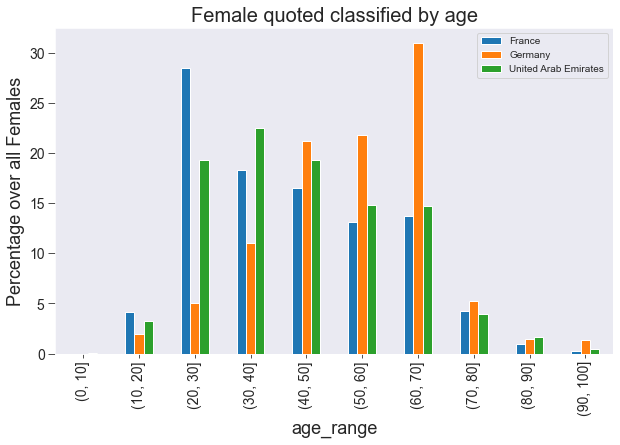

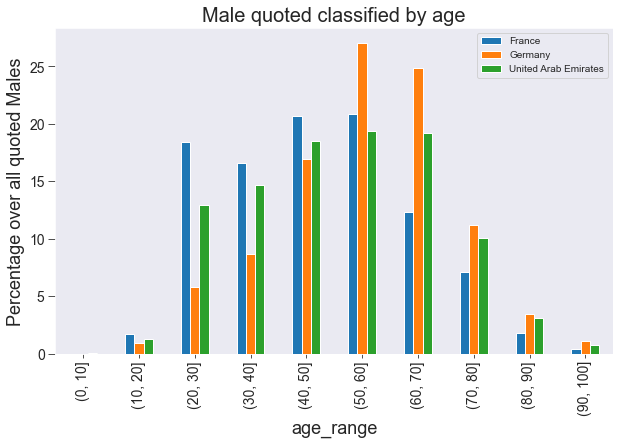

In [36]:
df_all_age_F = pd.concat([df_France_age_F, df_Germany_age_F, df_UAE_age_F], axis=1)
df_all_age_M = pd.concat([df_France_age_M, df_Germany_age_M, df_UAE_age_M], axis=1)
df_all_age_F.plot.bar(figsize=(10,6))
plt.ylabel('Percentage over all Females')
plt.title('Female quoted classified by age')
df_all_age_M.plot.bar(figsize=(10,6))
plt.ylabel('Percentage over all quoted Males')
plt.title('Male quoted classified by age')

## Quotation length Analysis

In [37]:
df_France_M[df_France_M['count']>0].sort_values('quotation_length').reset_index(drop=True)

,media_country,gender,age_range,quotation_length,count,year
0,France,Male,"(20, 30]",9,1,2016
1,France,Male,"(50, 60]",11,1,2015
2,France,Male,"(60, 70]",12,1,2019
3,France,Male,"(50, 60]",12,1,2018
4,France,Male,"(40, 50]",14,1,2017
...,...,...,...,...,...,...
13816,France,Male,"(50, 60]",1704,1,2018
13817,France,Male,"(50, 60]",1724,1,2018
13818,France,Male,"(50, 60]",1755,1,2018
13819,France,Male,"(30, 40]",1852,1,2019


In [38]:
def UNgroupby(df, to_ungroup):
    final_list = []
    for i in range (len(df)):
        to_append = [df[to_ungroup][i]]*df['count'][i]
        final_list.append(to_append)
    return pd.Series(final_list).explode().dropna().sort_values(ascending=True).reset_index(drop=True)

In [39]:
Qlength_France_F = UNgroupby(df_France_F, 'quotation_length')
Qlength_France_M = UNgroupby(df_France_M, 'quotation_length')

Qlength_Germany_F = UNgroupby(df_Germany_F, 'quotation_length')
Qlength_Germany_M = UNgroupby(df_Germany_M, 'quotation_length')

Qlength_UAE_F = UNgroupby(df_UAE_F, 'quotation_length')
Qlength_UAE_M = UNgroupby(df_UAE_M, 'quotation_length')

Qlength_all = pd.concat([Qlength_France_F,Qlength_France_M,Qlength_Germany_F,Qlength_Germany_M,Qlength_UAE_F, Qlength_UAE_M], axis=1)

In [40]:
Qlength_all = Qlength_all.rename(columns={0: "France - Female", 1: "France - Male", 2: "Germany - Female", 3: "Germany - Male", 4: "UAE - Female", 5: "UAE - Male"})

In [41]:
Qlength_all.agg(["mean", "median", "min", "max"])

,France - Female,France - Male,Germany - Female,Germany - Male,UAE - Female,UAE - Male
mean,122.994279,119.600277,100.972875,102.428665,129.399417,128.0549
median,108.000000,107.000000,85.000000,88.000000,108.000000,108.0000
min,11.000000,9.000000,15.000000,13.000000,11.000000,12.0000
max,1402.000000,1973.000000,964.000000,2195.000000,2028.000000,2349.0000


In [42]:
def plot_avg_quotes_length(df, conf_int=0.95):
    """
        Function to plot average length of quotes and confidence intervals depending on `gender`
    :param df: dataframe 
    :param conf_int: confidence interval for the plot
    """
    f = plt.figure(figsize=(12,8))
    sns.catplot(data = df, height=5, aspect=0.8)#, ci=conf_int)
    #plt.title('Average quotation length depending on gender for the year)
    plt.ylabel('Quotation length')
    #plt.tight_layout()
    #plt.ylim(113,126)
    plt.show()
    

In [43]:
def T_test(Series1, Series2, alpha = 0.05):
    print('Statistical test with H0: The two samples follow the same distributions and have the same mean')
    t_stat, p_val = ttest_ind(Series1, Series2, nan_policy='omit')
    print('der T-Test hat einen p-Wert von:', round(p_val,5))
    # interpret
    if p_val > alpha:
        print('The two distributions have the same mean: (fail to reject H0)')
    else:
        print('The two distributions have significantly different means (reject H0)')
    return p_val

In [44]:
pval_FR_FR = T_test(Qlength_France_F,Qlength_France_M)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.0
The two distributions have significantly different means (reject H0)


In [45]:
pval_GE_GE = T_test(Qlength_Germany_F,Qlength_Germany_M)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.00019
The two distributions have significantly different means (reject H0)


In [46]:
pval_UAE_UAE = T_test(Qlength_UAE_F,Qlength_UAE_M)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.04329
The two distributions have significantly different means (reject H0)


**Discussion**
- Would tend to go against our predictions ! 
- Females quoted in Newspaper from Frace or UAE have in general longer quotes than Males --> explanation?
- Opposite for Germany, which was better in representation of women... 


In [47]:
pval_FR_GE = T_test(Qlength_France_F,Qlength_Germany_F)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.0
The two distributions have significantly different means (reject H0)


In [48]:
pval_FR_UAE = T_test(Qlength_France_F,Qlength_UAE_F)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.0
The two distributions have significantly different means (reject H0)


In [49]:
pval_GE_UAE = T_test(Qlength_Germany_F,Qlength_UAE_F)

Statistical test with H0: The two samples follow the same distributions and have the same mean
der T-Test hat einen p-Wert von: 0.0
The two distributions have significantly different means (reject H0)


**Discussion**
- The quote length seems to differ more from country to country than  from gender. 
- None of the countries has a comparable mean, even without considering the genders --> field of research? not really, I would not pay to much attention to the quotes ..

## Year based approach 

In [50]:
df_France_years = df_France.groupby(['year','gender'])['count'].sum().to_frame(name="count")
df_Germany_years = df_Germany.groupby(['year','gender'])['count'].sum().to_frame(name="count")
df_UAE_years = df_UAE.groupby(['year','gender'])['count'].sum().to_frame(name="count")

In [51]:
prop_list_FR = []
prop_list_GE = []
prop_list_UAE = []
for i in range (0,len(df_France_years),2):
    prop_female_FR = df_France_years.iloc[i,0]/(df_France_years.iloc[i,0] + df_France_years.iloc[i+1,0])
    prop_male_FR = df_France_years.iloc[i+1,0]/(df_France_years.iloc[i,0] + df_France_years.iloc[i+1,0])
    prop_list_FR.append(prop_female_FR)
    prop_list_FR.append(prop_male_FR)
    
    prop_female_GE = df_Germany_years.iloc[i,0]/(df_Germany_years.iloc[i,0] + df_Germany_years.iloc[i+1,0])
    prop_male_GE = df_Germany_years.iloc[i+1,0]/(df_Germany_years.iloc[i,0] + df_Germany_years.iloc[i+1,0])
    prop_list_GE.append(prop_female_GE)
    prop_list_GE.append(prop_male_GE)
    
    prop_female_UAE = df_UAE_years.iloc[i,0]/(df_UAE_years.iloc[i,0] + df_UAE_years.iloc[i+1,0])
    prop_male_UAE = df_UAE_years.iloc[i+1,0]/(df_UAE_years.iloc[i,0] + df_UAE_years.iloc[i+1,0])
    prop_list_UAE.append(prop_female_UAE)
    prop_list_UAE.append(prop_male_UAE)
    

In [52]:
df_France_years['France'] = prop_list_FR
df_Germany_years['Germany'] = prop_list_GE
df_UAE_years['UAE'] = prop_list_UAE

In [53]:
df_France_years_F = df_France_years.groupby('year')['France'].head(1)
df_Germany_years_F = df_Germany_years.groupby('year')['Germany'].head(1)
df_UAE_years_F = df_UAE_years.groupby('year')['UAE'].head(1)

In [54]:
df_all_years = pd.concat([df_France_years_F, df_Germany_years_F, df_UAE_years_F], axis=1)

In [55]:
df_all_years.index = df_all_years.index.droplevel(1)
df_all_years

,France,Germany,UAE
year,,,
2015,0.058790,0.144291,0.132836
2016,0.092710,0.160273,0.167535
2017,0.088993,0.190586,0.160957
2018,0.086875,0.169531,0.173576
2019,0.125150,0.191027,0.167135


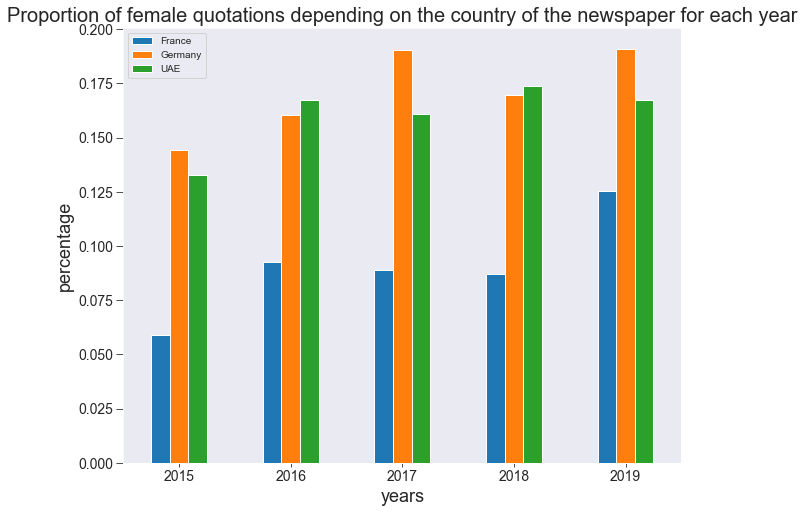

In [56]:

fig1 = df_all_years.plot(kind='bar', title='Proportion of female quotations depending on the country of the newspaper for each year', rot=0, xlabel='years', ylabel='percentage',figsize=(10,8))


In [57]:
def linear_regression(outcome, pred, df, print_sum = False):
    """
        Function to compute the linear regression using the formula: outcome ~ pred
        param outcome: outcome of the linear model
        param pred: predictor of the linear model
        return: results (df containing coefficients, standard deviations and pvalues)
    """
    # Declares the model
    mod = smf.ols(formula=outcome+'~'+pred, data=df)
    np.random.seed(2) # Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
    res = mod.fit()
    if print_sum :
        print(res.summary())

    # coefficient(s)
    coeffs = pd.Series(res.params.values)

    # p-values
    p_values = res.pvalues
    stds = pd.Series(res.bse.values)
    
    # r-squared of the model
    r_squared = res.rsquared

    return coeffs, stds, p_values, r_squared

In [58]:
df_all_years['year'] = df_all_years.index

In [61]:
# linear fit using statsmodels
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
print('\n\n*********************** LINEAR REGRESSION FOR FRANCE ************************\n\n')
coeffs, stds, p_values_FR, r_squared = linear_regression('France', 'year', df_all_years,True)
print('\n\n*********************** LINEAR REGRESSION FOR GERMANY ************************\n\n')
coeffs, stds, p_values_GE, r_squared = linear_regression('Germany', 'year', df_all_years,True)
print('\n\n*********************** LINEAR REGRESSION FOR UNITED ARAB EMIRATES ******************\n\n')
coeffs, stds, p_values_UAE, r_squared = linear_regression('UAE', 'year', df_all_years,True)



*********************** LINEAR REGRESSION FOR FRANCE ************************


                            OLS Regression Results                            
Dep. Variable:                 France   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     7.835
Date:                Thu, 02 Dec 2021   Prob (F-statistic):             0.0679
Time:                        12:44:40   Log-Likelihood:                 15.408
No. Observations:                   5   AIC:                            -26.82
Df Residuals:                       3   BIC:                            -27.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [64]:
print('With a pvalue of', round(p_values_FR[1],3), 'for France, of', round(p_values_GE[1],3), 'for Germany and of', round(p_values_UAE[1],3),'for the United Arab Emirates, one cannot reject the null Hypothesis that there is no real relation between the year and the % Female in the quotes.')

With a pvalue of 0.068 for France, of 0.098 for Germany and of 0.157 for the United Arab Emirates, one cannot reject the null Hypothesis that there is no real relation between the year and the % Female in the quotes.


**Discuss**
- One cannot say that thereis an evolution over the years, even if in the graph it does seem that France "improved" ove rthe years.
- The lack of points does not allow us to draw ro ust conclusions on the evolution.. Would have been interesting though..
- however France's p_value i quite low (about 5%) we could.. 
- WHy the hell are Germany and France so different ??

